# This reads most recent iTunes reviews for the Zelle Purple app 

    - Reading customer reviews in JSON format, 
    - from the iTunes Store API,
    - using pandas python for data mining,
    - and outputs two word-cloud images

Created on 2019 Mar 1 by Edwin Campos

Last modification 2019 Mar 1 by ecampos.phd@gmail.com

In [1]:
# Dependencies
import pandas as pd
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
# Global variables
URL = 'http://itunes.apple.com/rss/customerreviews/id=1260755201/sortby=mostrecent/json'

In [3]:
# Ingest inputs
#response = requests.get(url)
df = pd.read_json(URL)#, orient='columns')
print(df)

                                                      feed
author   {'name': {'label': 'iTunes Store'}, 'uri': {'l...
entry    [{'author': {'uri': {'label': 'https://itunes....
icon      {'label': 'http://itunes.apple.com/favicon.ico'}
id       {'label': 'http://itunes.apple.com/rss/custome...
link     [{'attributes': {'rel': 'alternate', 'type': '...
rights              {'label': 'Copyright 2008 Apple Inc.'}
title          {'label': 'iTunes Store: Customer Reviews'}
updated             {'label': '2019-03-01T10:49:15-07:00'}


In [4]:
# Time stamp is not available for particular reviews, but for 10-pages aggregates
time_stamp = df.feed.updated['label']
print(time_stamp)

2019-03-01T10:49:15-07:00


In [5]:
#print(df.feed.entry)
reviews_df = pd.DataFrame()
for review in df.feed.entry:
    version= review['im:version']['label']
    rating = review['im:rating']['label']
    title  = review['title']['label']
    content= review['content']['label']
    
    data_dict = {'version': version, 'rating': int(rating),
                 'title': title,'content': content
                }
    #print(data_dict)
    new_row_pd = pd.Series(data_dict)
    '''
    new_row_pd = pd.Series({'version': version, 
                               'rating': rating,
                               'title': title,
                               'content': content
                              })
    '''
    #print(new_row_pd)
  
    reviews_df = reviews_df.append(new_row_pd, ignore_index=True)


In [6]:
print(reviews_df)

                                              content  rating  \
0                                            NO FEES!     5.0   
1                               It's very easy to use     5.0   
2   As soon as I entered my phone number to verify...     1.0   
3                                                   👏     5.0   
4   For Happy Occasion and or in time of emergency...     5.0   
5   Unintuitive interface. Difficult navigation wh...     1.0   
6   Company was made aware of person using the app...     1.0   
7   I spent half a day trying to register on this ...     1.0   
8   I’ve been trying to add my email on my account...     1.0   
9   DO NOT USE QUICK PAY/ZELLE I NEVER HAD ISSUES ...     1.0   
10  The app is very easy to use, but if you aren’t...     2.0   
11   Putting a limit makes me want to use another app     1.0   
12  App said I needed to update so I updated in Ap...     1.0   
13  For reasons unknown they can’t authenticate my...     1.0   
14  You have to keep doin

In [7]:
# Separate Positive and Negative Reviews
positive_reviews_df = reviews_df[reviews_df['rating'] >= 4]
count_positive_reviews = len(positive_reviews_df)
negative_reviews_df = reviews_df[reviews_df['rating'] <= 2]
count_negative_reviews = negative_reviews_df.shape[0]
sentiment_summary_text = ' %i positive reviews and %i negative reviews.' %\
                          (count_positive_reviews, count_negative_reviews)
print(sentiment_summary_text )


 16 positive reviews and 30 negative reviews.


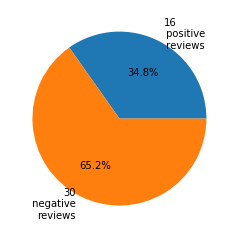

In [8]:
# Create a pie plot to see if the distribution is unbalanced
labels = str(count_positive_reviews)+'\n positive\n reviews', str(count_negative_reviews)+'\n negative\nreviews'
sizes = [count_positive_reviews, count_negative_reviews]
#plt.style.use('ggplot')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig('./AnalyzeSentimentDistrib.png')
plt.show()  
# Recall that plt.show() should be at the end of the code sniippet, because it erases the display object

In [9]:
print(positive_reviews_df)

                                              content  rating  \
0                                            NO FEES!     5.0   
1                               It's very easy to use     5.0   
3                                                   👏     5.0   
4   For Happy Occasion and or in time of emergency...     5.0   
18  Love it my daughter introduced this app to me,...     5.0   
22  Maybe I just haven’t figured everything out, b...     4.0   
25  Great app for me to send and receive with my l...     5.0   
29  This is a awesome app, just needs a few new fe...     4.0   
31  Nice app, but it Doesn’t use Touch ID as said ...     4.0   
33                             Extremely easy to use!     5.0   
41  I love this app. Makes it very convenient to p...     5.0   
42                                                Yay     5.0   
43        Great app. Convenient and easy to navigate.     5.0   
44  Never had a problem with $ transactions and wo...     5.0   
45  It just makes my life

In [10]:
# Tokenization: Split text into tokens, in this case into individual words.
# Extract positive words
positive_words_string = positive_reviews_df.content.str.cat(sep=' ')
# Extract negative words
negative_words_string = negative_reviews_df.content.str.cat(sep=' ')

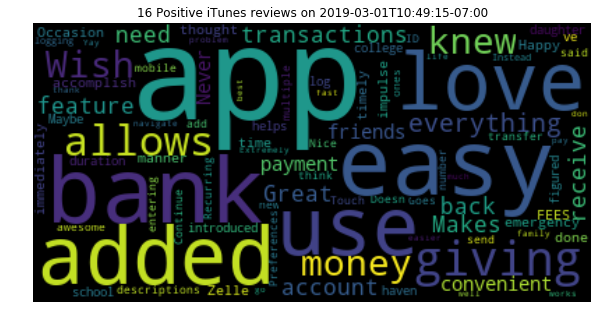

In [11]:
# Plot word-cloud image for Positive Reviews
positive_wordcloud = WordCloud().generate(positive_words_string)
negative_wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(negative_words_string)

plt.figure(figsize=(10,8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('%i Positive iTunes reviews on %s' % (count_positive_reviews, time_stamp) )
plt.savefig('./AnalyzeSentimentPositive.png')
plt.show()
# Recall that plt.show() should be at the end of the code sniippet, because it erases the display object

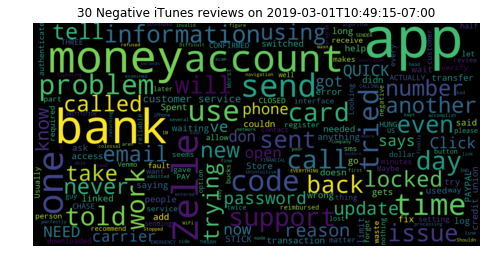

In [12]:
# Plot word-cloud image for Negative Reviews
negative_wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(negative_words_string)

plt.figure(figsize=(8,8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('%i Negative iTunes reviews on %s' % (count_negative_reviews, time_stamp) )

plt.savefig('./AnalyzeSentimentNegative.png')
plt.show()  
# Recall that plt.show() should be at the end of the code sniippet, because it erases the display object

## Future Work
1. Compute Term-Frequency Inverse-Document-Frequency(TF IDF) metric

See for example section 2.2.2 in https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf

    from sklearn.feature_extraction.text import TfidfVectorizer

For this, vectorize the word counts: Use a CountVectorizer, which converts a collection of text documents to a matrix of the counts of occurences of each word in the document.

2. In another notebook (PredictSentiment), I will train a Logistic Regression model to predict sentiment.